In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Students Social Media Addiction.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aminasalamt/social-media-dataset-2025",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipykernel_1225/3507842688.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  C

Assumptions
- dataset is a representative random sample of our population of interest
- observations are independent

In [ ]:
df.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
351,352,22,Male,Graduate,Denmark,3.7,Facebook,No,8.1,8,In Relationship,2,4
202,203,20,Female,Undergraduate,Bangladesh,4.3,Instagram,Yes,7.6,5,Single,3,7
608,609,23,Female,Graduate,Switzerland,4.4,Instagram,No,7.4,7,In Relationship,2,5
63,64,18,Female,High School,Czech Republic,6.1,Snapchat,Yes,5.2,4,Single,4,9
17,18,19,Female,High School,Norway,5.0,Instagram,Yes,5.7,5,In Relationship,3,8


## 1. Is there any difference in social media usage between Male and Female?

In [ ]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [ ]:
# num of countries
df['Country'].nunique()

110

In [ ]:
# proportions
df['Gender'].value_counts()

Gender
Female    353
Male      352
Name: count, dtype: int64

In [ ]:
male_usage_hours = df[df['Gender']=="Male"]["Avg_Daily_Usage_Hours"]
female_usage_hours = df[df['Gender']=="Female"]["Avg_Daily_Usage_Hours"]

/tmp/ipykernel_1225/2751031392.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


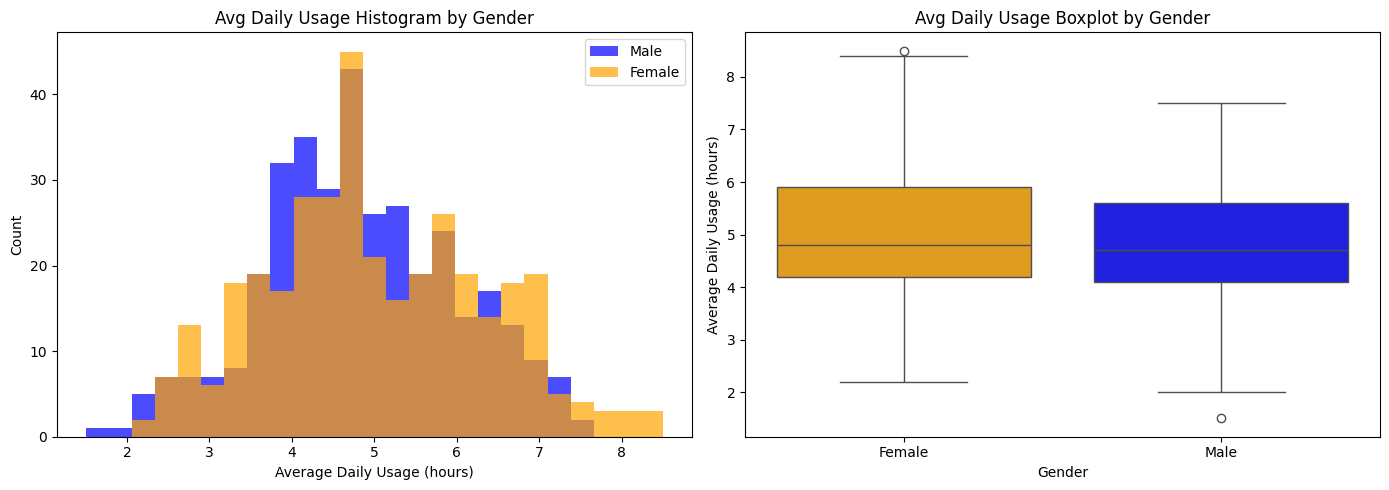

In [ ]:
bins = np.histogram_bin_edges(
    pd.concat([male_usage_hours, female_usage_hours]),
    bins=25
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram subplot
axes[0].hist(
    male_usage_hours,
    bins=bins,
    alpha=0.7,
    label="Male",
    color="blue"
)
axes[0].hist(
    female_usage_hours,
    bins=bins,
    alpha=0.7,
    label="Female",
    color="orange"
)
axes[0].set_title("Avg Daily Usage Histogram by Gender")
axes[0].set_xlabel("Average Daily Usage (hours)")
axes[0].set_ylabel("Count")
axes[0].legend()

# Boxplot subplot
sns.boxplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Usage_Hours",
    ax=axes[1],
    palette={"Male": "blue", "Female": "orange"}
)
axes[1].set_title("Avg Daily Usage Boxplot by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Average Daily Usage (hours)")

plt.tight_layout()
plt.show()

The central value is around the same for both gender with median around 4.8 hours. Difference is mainly in spread, tails and outliers although not very significant. It looks like more female are in high usage group than male and males tends to cluster around the modal value. But overall, it looks like gender is not a strong predictor for avg daily usage for a typical user. 

### Find Confidence Interval

In [ ]:
# --- First, get sample statistics ---
# sample means
u_male = male_usage_hours.mean()   
u_female = female_usage_hours.mean()   
# sample standard deviations
std_male = male_usage_hours.std(ddof=1)   
std_female = female_usage_hours.std(ddof=1)   

print(f"Sample Means -> Male: {u_male:.2f}, Female: {u_female:.2f}")
print(f"Sample Std Devs -> Male: {std_male:.2f}, Female: {std_female:.2f}")

# --- Define confidence level and find associated z-score ---
# We'll define confidence level as 95%
# and find the associated z-score for a 95% confidence level
from scipy.stats import norm
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)  # z-score corresponding to 95% confidence
print(f"Confidence Level: {confidence_level*100:.0f}%, Z-Score: {z_score:.4f}")

# --- Find Standard Error (SE = S / sqrt(n)) ---
# This measures variability of sample statistics (sample mean in this case)
# Shows how much the sample mean is likely to differ from the actual population mean
male_std_err = std_male / np.sqrt(len(male_usage_hours))
female_std_err = std_female / np.sqrt(len(female_usage_hours))
print(f"Standard Errors -> Male: {male_std_err:.3f}, Female: {female_std_err:.3f}")

# --- Margin of error (ME = z-score * SE) ---
male_margin_of_err = z_score * male_std_err
female_margin_of_err = z_score * female_std_err
print(f"Margins of Error -> Male: {male_margin_of_err:.3f}, Female: {female_margin_of_err:.3f}")

# --- Calculate Confidence Intervals ---
male_CI_lower_bound = u_male - male_margin_of_err
male_CI_upper_bound = u_male + male_margin_of_err
female_CI_lower_bound = u_female - female_margin_of_err
female_CI_upper_bound = u_female + female_margin_of_err

print(f"Male 95% CI: ({male_CI_lower_bound:.2f}, {male_CI_upper_bound:.2f})")
print(f"Female 95% CI: ({female_CI_lower_bound:.2f}, {female_CI_upper_bound:.2f})")

Sample Means -> Male: 4.83, Female: 5.01
Sample Std Devs -> Male: 1.17, Female: 1.33
Confidence Level: 95%, Z-Score: 1.9600
Standard Errors -> Male: 0.062, Female: 0.071
Margins of Error -> Male: 0.122, Female: 0.139
Male 95% CI: (4.70, 4.95)
Female 95% CI: (4.87, 5.15)


In [ ]:
# difference of means
diff = u_female - u_male
diff * 60

np.float64(11.09470770023174)

The difference is only around 11 minutes. This slight difference could be due to actual difference in underlying male/female population of interest or simply bias in sampling such as self-selection bias or just a small random variation.

However, for now, we'll take this value and try to quantify the standardized [effect size](https://www.scribbr.com/statistics/effect-size/) using Cohen's d (which is effect size measure between two groups) with pooled standard deviation.

In [ ]:
# calculating Cohen's d
mean_diff = female_usage_hours.mean() - male_usage_hours.mean()

var_m, var_f = male_usage_hours.var(ddof=1), female_usage_hours.var(ddof=1)
count_m, count_f = len(male_usage_hours), len(female_usage_hours)
pooled_var = ((count_m - 1) * var_m + (count_f - 1) * var_f) / (count_m + count_f - 2) # with -1 ddof
pooled_std = np.sqrt(pooled_var)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: 0.147


The difference in mean usage between genders is tiny. Gender explains very little of the variation in daily usage.

Now, let's perform a t-test for comparing the mean of our two groups (male & female) to see if there are any meaningful difference. 
This will be Welch two-sample, two-tailed t-test. We are using Welch's test instead of Student's T test as we are not confident that the variance of our male and female groups are the same.


T-Statistic: -1.9563, P-Value: 0.0508
Fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in average daily social media usage hours between males and females.


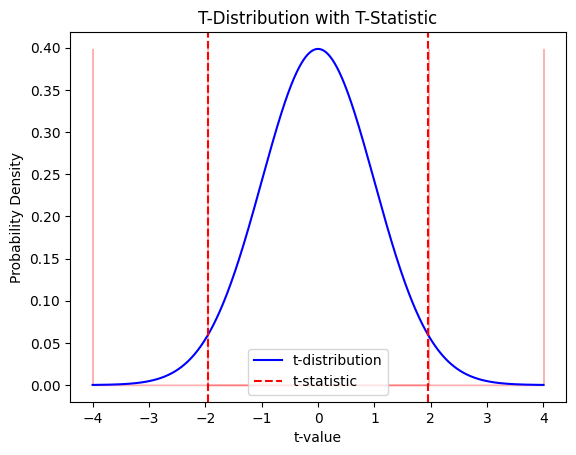

In [ ]:
## -- Hypothesis Testing ---
## conduct a two-sample two-tailed t-test (Welch's t-test)

# define hypotheses
null_hypothesis = "There is no difference in average daily social media usage hours between males and females."
alternative_hypothesis = "There is a difference in average daily social media usage hours between males and females."

# choose significance level
alpha = 0.05

# find t-statistic and p-value
from scipy.stats import ttest_ind, t

t_stat, p_value = ttest_ind(
    male_usage_hours,
    female_usage_hours,
    equal_var=False
)

# print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


# interpret results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print(
        "Conclusion: There is a statistically significant difference in "
        "average daily social media usage hours between males and females."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "Conclusion: There is no statistically significant difference in "
        "average daily social media usage hours between males and females."
    )


# --- Plot Welch's t-distribution ---
# Welch–Satterthwaite degrees of freedom
n1 = len(male_usage_hours)
n2 = len(female_usage_hours)
s1_sq = np.var(male_usage_hours, ddof=1)
s2_sq = np.var(female_usage_hours, ddof=1)

df = (s1_sq / n1 + s2_sq / n2) ** 2 / (
    (s1_sq**2) / (n1**2 * (n1 - 1)) +
    (s2_sq**2) / (n2**2 * (n2 - 1))
)

x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df=df)

plt.plot(x, y, label="t-distribution")
plt.axvline(t_stat, linestyle="--", label="t-statistic")
plt.axvline(-t_stat, linestyle="--")
plt.fill_between(x, y, where=(x >= abs(t_stat)), alpha=0.3)
plt.fill_between(x, y, where=(x <= -abs(t_stat)), alpha=0.3)

plt.title("Welch's t-Distribution with Test Statistic")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

The observed difference in mean social media usage was about two standard errors apart, but the probability of seeing such a difference under the null hypothesis (5.08%) was just slightly too large to reject the null at alpha = 0.05.

## Conclusion

In this notebook, we explored whether there is a meaningful difference in social media usage between male and female students using a dataset of 2025 social media behavior. We used descriptive statistics, confidence intervals, and hypothesis testing to answer our research question.

**Main Results:**
- **Average Daily Usage**: Males and females show very similar average daily social media usage (~4.8 hours), with females averaging just 11 minutes more than males
- **Effect Size**: Cohen's d ≈ 0.087, indicating a negligible effect size
- **Statistical Significance**: Using Welch's two-sample t-test with α = 0.05, we obtained a p-value of 5.08%, which marginally exceeds our significance threshold
- **Conclusion**: We failed to reject the null hypothesis. There is **no statistically significant difference** in average daily social media usage hours between males and females in this sample

### Interpretation

While females showed a slightly higher mean usage than males (11 minutes per day), this difference is:
1. **Practically negligible** - the difference represents less than 2% variation in daily usage
2. **Not statistically significant** at the conventional α = 0.05 level - the p-value of 5.08% suggests this difference could reasonably occur due to random sampling variation
3. **Explained by minimal effect** - Cohen's d of 0.087 indicates gender explains virtually none of the variation in daily social media usage

### Implications

This finding suggests that **gender is not a meaningful predictor of social media addiction risk** among students. Other factors not examined in this gender-focused analysis (such as personality traits, academic performance, mental health indicators, or specific platform preferences) may be more influential in determining problematic social media use.

### Limitations and Future Research

- The slight non-significance (p = 0.0508 vs α = 0.05) warrants further investigation with larger sample sizes
- This analysis focused exclusively on gender; a more comprehensive model incorporating additional variables could provide deeper insights into social media addiction patterns
- The dataset represents a cross-sectional snapshot; longitudinal studies would better illuminate how usage patterns evolve over time